# pandas 进阶修炼 ｜早起Python
<br>

**本习题由公众号【早起Python & 可视化图鉴】 原创，转载及其他形式合作请与我们联系（微信号`sshs321`)，未经授权严禁搬运及二次创作，侵权必究！**



本习题基于 `pandas` 版本 `1.1.3`，所有内容应当在 `Jupyter Notebook` 中执行以获得最佳效果。

不同版本之间写法可能会有少许不同，如若碰到此情况，你应该学会如何自行检索解决。

## 6 - 数据分组与聚合



<br>

**<font color = '#5172F0'><font size=3.5>必读👇👇👇**</font>

在前面 5 节的习题中，大多是关于利用 pandas 进行**数据处理**的操作。

现在，终于来到**数据分析**部分。

而**数据的分组与聚合**，也是在数据分析中十分高频的过程。

本节习题我整理了一些利用 pandas 进行数据的分组与聚合的常用操作。

注意，为了更清晰的表达我的问题，本节习题中大部分习题会**保留运行结果**，也是我题目预期产生的结果，如果不理解题目所问，可以进行参考。

## 初始化

<br>

该 `Notebook` 版本为**纯习题版**

如果需要答案或者提示，可以微信搜索公众号「早起Python」获取！

## 加载数据

In [1]:
import pandas as pd

df = pd.read_csv("某招聘网站数据.csv",parse_dates=['createTime'])

## 分组

### 1 - 分组统计｜均值

计算各区(`district`)的薪资(`salary`)均值

In [2]:
df.groupby('district')[['salary']].mean()

salary
district              
上城区       26250.000000
下沙        30000.000000
余杭区       33583.333333
拱墅区       28500.000000
江干区       25250.000000
滨江区       31428.571429
萧山区       36250.000000
西湖区       30893.939394

### 2 - 分组统计｜取消索引

重新按照上一题要求进行分组，但不使用 `district` 做为索引

In [3]:
df.groupby('district', as_index=False)[['salary']].mean()

district        salary
0      上城区  26250.000000
1       下沙  30000.000000
2      余杭区  33583.333333
3      拱墅区  28500.000000
4      江干区  25250.000000
5      滨江区  31428.571429
6      萧山区  36250.000000
7      西湖区  30893.939394

### 3 - 分组统计｜排序

计算并提取平均薪资最高的区

In [4]:
df.groupby('district')[['salary']].mean().sort_values('salary' , ascending=False)[:1]


salary
district         
萧山区       36250.0

### 4 - 分组统计｜频率

计算不同行政区(`district`)，不同规模公司(`companySize`)出现的次数

In [9]:
(df.groupby(['district', 'companySize'], as_index=False).size()
    .rename({"district": '地区', 'companySize': '公司规模'}, axis=1)
    .set_index(['地区','公司规模'])
)

size
地区  公司规模           
上城区 50-150人       2
下沙  150-500人      1
余杭区 150-500人     13
    2000人以上      14
    50-150人       7
    500-2000人     2
拱墅区 2000人以上       1
    50-150人       1
    500-2000人     2
江干区 2000人以上       2
    500-2000人     2
滨江区 150-500人     14
    2000人以上       6
    500-2000人     1
萧山区 50-150人       1
    500-2000人     3
西湖区 15-50人        1
    150-500人      7
    2000人以上      11
    50-150人       5
    500-2000人     9

### 5 - 分组统计｜修改索引名

将上一题的索引名修改为
- district -> 行政区
- companySize -> 公司规模

In [11]:
(df.groupby(['district', 'companySize'], as_index=False).size()
    .rename({"district": '地区', 'companySize': '公司规模'}, axis=1)
    .set_index(['地区','公司规模'])
)

size
地区  公司规模           
上城区 50-150人       2
下沙  150-500人      1
余杭区 150-500人     13
    2000人以上      14
    50-150人       7
    500-2000人     2
拱墅区 2000人以上       1
    50-150人       1
    500-2000人     2
江干区 2000人以上       2
    500-2000人     2
滨江区 150-500人     14
    2000人以上       6
    500-2000人     1
萧山区 50-150人       1
    500-2000人     3
西湖区 15-50人        1
    150-500人      7
    2000人以上      11
    50-150人       5
    500-2000人     9

In [12]:
df.pivot_table(index=['district', 'companySize'], values='positionName', aggfunc='count')

positionName
district companySize              
上城区      50-150人                 2
下沙       150-500人                1
余杭区      150-500人               13
         2000人以上                14
         50-150人                 7
         500-2000人               2
拱墅区      2000人以上                 1
         50-150人                 1
         500-2000人               2
江干区      2000人以上                 2
         500-2000人               2
滨江区      150-500人               14
         2000人以上                 6
         500-2000人               1
萧山区      50-150人                 1
         500-2000人               3
西湖区      15-50人                  1
         150-500人                7
         2000人以上                11
         50-150人                 5
         500-2000人               9

### 6 - 分组统计｜计数

计算上一题，每个区出现的公司数量

In [13]:
df.groupby('district',as_index=False).size().set_index('district')

size
district      
上城区          2
下沙           1
余杭区         36
拱墅区          4
江干区          4
滨江区         21
萧山区          4
西湖区         33

In [14]:
df.pivot_table(index='district', values='positionName',aggfunc='count')

positionName
district              
上城区                  2
下沙                   1
余杭区                 36
拱墅区                  4
江干区                  4
滨江区                 21
萧山区                  4
西湖区                 33

### 7 - 分组查看｜全部

将数据按照 `district`、`salary` 进行分组，并查看各分组内容

In [15]:
gg = df.groupby(['district', 'salary'], as_index = False)
gg.groups

{('上城区', 22500): [81], ('上城区', 30000): [97], ('下沙', 30000): [31], ('余杭区', 7500): [84], ('余杭区', 20000): [52, 103], ('余杭区', 22500): [23, 51], ('余杭区', 25000): [62], ('余杭区', 27500): [24, 49], ('余杭区', 29000): [93], ('余杭区', 30000): [4, 10, 13, 18, 59, 61, 65, 68, 74, 76, 86, 92, 94], ('余杭区', 35000): [101], ('余杭区', 37500): [0, 32, 38, 39, 41], ('余杭区', 40000): [60, 87], ('余杭区', 45000): [25], ('余杭区', 50000): [5, 64, 90], ('余杭区', 60000): [8, 82], ('拱墅区', 24000): [72], ('拱墅区', 30000): [54, 89, 96], ('江干区', 3500): [2], ('江干区', 22500): [45], ('江干区', 30000): [73], ('江干区', 45000): [3], ('滨江区', 7500): [83], ('滨江区', 15000): [1], ('滨江区', 20000): [21, 40], ('滨江区', 22500): [37], ('滨江区', 30000): [22, 53, 55, 58, 67, 80, 102], ('滨江区', 32500): [26], ('滨江区', 37500): [17, 28, 57, 77], ('滨江区', 42500): [91], ('滨江区', 45000): [43, 47], ('滨江区', 50000): [44], ('萧山区', 25000): [100], ('萧山区', 30000): [6], ('萧山区', 45000): [66, 69], ('西湖区', 6500): [71], ('西湖区', 20000): [12], ('西湖区', 21500): [104], ('西湖区', 22500): [48, 70

### 8 - 分组查看｜指定

将数据按照 `district`、`salary` 进行分组，并查看西湖区薪资为 30000 的工作

In [16]:
df.groupby(['district', 'salary']).get_group(('西湖区', 30000))

positionName companySize industryField financeStage  \
11  大数据分析工程师(J11108)     2000人以上    移动互联网,企业服务         上市公司   
27            数据分析经理     2000人以上            硬件        不需要融资   
33         数据分析师（社招）   500-2000人         移动互联网         上市公司   
34           商业数据分析师     50-150人    移动互联网,企业服务           B轮   
85           高级数据分析师   500-2000人         移动互联网         上市公司   
88           资深数据分析师   500-2000人         移动互联网           A轮   
98         数据分析建模工程师     50-150人     数据服务,信息安全           A轮   

                        companyLabelList  firstType secondType thirdType  \
11      ['技能培训', '年底双薪', '带薪年假', '岗位晋升']  开发|测试|运维类       数据开发      数据分析   
27      ['年终分红', '带薪年假', '年度旅游', '岗位晋升']  产品|需求|项目类       数据分析      数据分析   
33      ['绩效奖金', '股票期权', '年底双薪', '专项奖金']  产品|需求|项目类       数据分析      数据分析   
34         ['定期体检', '帅哥多', '领导好', '美女多']     市场|商务类      市场|营销    商业数据分析   
85  ['包午餐晚餐', '奖金多多多', '零食下午茶', '全员出国游']  产品|需求|项目类       数据分析      数据分析   
88      ['岗位晋升', '年度旅游', '年底双薪', '午餐补助']  产品|需求|项目类       数据分析      数据分析   
98   ['午餐补助', '带薪年假', '16到18薪', '法定节假日']  开发|测试|运维类       人工智能      机器学习   

            createTime district  salary workYear jobNature education  \
11 2020-03-16 09:25:00      西湖区   30000    应届毕业生        全职        本科   
27 2020-03-16 11:24:00      西湖区   30000    5-10年        全职        本科   
33 2020-03-16 11:18:00      西湖区   30000    应届毕业生        全职        不限   
34 2020-03-16 11:13:00      西湖区   30000     1-3年        全职        硕士   
85 2020-03-14 21:28:00      西湖区   30000     3-5年        全职        本科   
88 2020-03-15 19:43:00      西湖区   30000     3-5年        全职        大专   
98 2020-03-14 19:00:00      西湖区   30000     1-3年        全职        本科   

      positionAdvantage    imState  score  matchScore  famousCompany  
11  六险一金 带薪年假 年度体检 周末双休      today     17    4.245066          False  
27     股票期权,千万级用户,试用期全薪      today      6    1.164082           True  
33     16-18薪 大数据A股上市公司      today     15    1.020377           True  
34          发挥空间大,职业发展好      today      5    1.095633          False  
85      福利好，年轻有活力，行业前景好      today      2    0.389503          False  
88    六险一金,餐饮补贴,双休,出国旅游      today      1    0.502371          False  
98  海量数据 全链路建模实践 16-18薪  threeDays      0    0.356308          False

### 9 - 分组规则｜通过匿名函数1

根据 createTime 列，计算每天不同 行政区 新增的岗位数量

In [17]:
# mark red
df.groupby([df.createTime.apply(lambda x: x.strftime("%d")), 'district'], as_index= False).size().rename({'createTime':'发布日','district':'地区'}, axis=1).set_index(['发布日', '地区'])

size
发布日 地区       
09  余杭区     1
10  拱墅区     1
11  萧山区     1
    西湖区     1
12  上城区     1
13  西湖区     1
14  余杭区     1
    拱墅区     1
    滨江区     1
    西湖区     3
15  余杭区     6
    滨江区     2
    西湖区     1
16  上城区     1
    下沙      1
    余杭区    28
    拱墅区     2
    江干区     4
    滨江区    18
    萧山区     3
    西湖区    27

In [22]:
df.pivot_table(
    index=[df.createTime.apply(lambda x: x.strftime("%d")).rename('发布日'), df.district.rename('区域')], 
    values='positionName', aggfunc='count'
)

positionName
发布日 区域               
09  余杭区             1
10  拱墅区             1
11  萧山区             1
    西湖区             1
12  上城区             1
13  西湖区             1
14  余杭区             1
    拱墅区             1
    滨江区             1
    西湖区             3
15  余杭区             6
    滨江区             2
    西湖区             1
16  上城区             1
    下沙              1
    余杭区            28
    拱墅区             2
    江干区             4
    滨江区            18
    萧山区             3
    西湖区            27

微信搜索公众号「早起Python」，关注后可以获得更多资源！

In [ ]:
## 常规方法
df['发布日'] = df.createTime.apply(lambda x: x.strftime("%d"))
df.groupby(['发布日', 'district'], as_index=False).size().rename({'district':'地区'}, axis=1).set_index(['发布日', '地区'])

size
发布日 地区       
09  余杭区     1
10  拱墅区     1
11  萧山区     1
    西湖区     1
12  上城区     1
13  西湖区     1
14  余杭区     1
    拱墅区     1
    滨江区     1
    西湖区     3
15  余杭区     6
    滨江区     2
    西湖区     1
16  上城区     1
    下沙      1
    余杭区    28
    拱墅区     2
    江干区     4
    滨江区    18
    萧山区     3
    西湖区    27

### 10 - 分组规则｜通过匿名函数2

计算各行政区 (district) 的企业领域（industryField）包含电商的总数



In [23]:
df.groupby('district').industryField.apply(lambda x:  x.str.contains('电商').sum()).sort_values(ascending=False)

district
余杭区    9
滨江区    9
西湖区    4
萧山区    3
江干区    2
下沙     1
上城区    0
拱墅区    0
Name: industryField, dtype: int64

In [24]:
df.pivot_table(
    index='district', 
    values='industryField', 
    aggfunc=lambda x:  x.str.contains('电商').sum()
).sort_values('industryField', ascending=False)

industryField
district               
余杭区                   9
滨江区                   9
西湖区                   4
萧山区                   3
江干区                   2
下沙                    1
上城区                   0
拱墅区                   0

In [29]:

df.groupby('district').apply(
        lambda x: x.industryField.str.contains('电商').sum()
    ).sort_values(ascending=False)


district
余杭区    9
滨江区    9
西湖区    4
萧山区    3
江干区    2
下沙     1
上城区    0
拱墅区    0
dtype: int64

In [31]:
# 没有数量为 0 的项
df[df.industryField.str.contains('电商')].groupby('district')['industryField'].size().sort_values(ascending=False)

district
余杭区    9
滨江区    9
西湖区    4
萧山区    3
江干区    2
下沙     1
Name: industryField, dtype: int64

![公众号：早起Python](http://liuzaoqi.oss-cn-beijing.aliyuncs.com/2021/09/18/16319660121648.jpg?域名/sample.jpg?x-oss-process=style/stylename)

### 11 - 分组规则｜通过内置函数

通过 positionName 的长度进行分组，并计算不同长度岗位名称的薪资均值

In [32]:
df.groupby(by=lambda i: len(df.loc[i].positionName))['salary'].mean()

4     30125.000000
5     34083.333333
6     32954.545455
7     29816.666667
8     31875.000000
9     29375.000000
10    30000.000000
11    34166.666667
12    29583.333333
13    38833.333333
14    40000.000000
15    26000.000000
16    28750.000000
17    40000.000000
18    25750.000000
19    45000.000000
21    21500.000000
23    60000.000000
Name: salary, dtype: float64

### 12 - 分组规则｜通过字典

将 score 和 matchScore 的和记为总分，与 salary 列同时进行分组，并查看结果

In [ ]:
pd.DataFrame({'总分': df['score'] + df['matchScore'], '薪资': df['salary']})

总分     薪资
0    248.101875  37500
1    208.559414  15000
2     94.972357   3500
3     80.874153  45000
4     78.755375  30000
..          ...    ...
100    0.314259  25000
101    0.283276  35000
102    0.256719  30000
103    0.281062  20000
104    0.159343  21500

[105 rows x 2 columns]

In [34]:
df.groupby([df['score'] + df['matchScore'], df['salary']]).size()

            salary
0.159343    21500     1
0.256719    30000     1
0.281062    20000     1
0.283276    35000     1
0.314259    25000     1
                     ..
78.755375   30000     1
80.874153   45000     1
94.972357   3500      1
208.559414  15000     1
248.101875  37500     1
Length: 105, dtype: int64

### 13 - 分组规则｜通过多列

计算不同 工作年限（`workYear`）和 学历（`education`）之间的薪资均值

In [35]:
df.groupby(['workYear','education'])[['salary']].mean()

salary
workYear education              
1-3年     不限         36250.000000
         本科         31000.000000
         硕士         36875.000000
3-5年     不限         30312.500000
         大专         28125.000000
         本科         31828.125000
5-10年    不限         26250.000000
         本科         28423.076923
不限       不限         35000.000000
         本科         35625.000000
应届毕业生    不限         32500.000000
         本科         33833.333333

In [39]:
df.pivot_table(index=['workYear','education'], values='salary', aggfunc='mean').style.bar(subset=['salary'], vmin=0)

### 14 - 分组转换｜ transform

在原数据框 df 新增一列，数值为该区的平均薪资水平

In [67]:
import numpy as np
df['avg_salary'] = df.groupby(['district'])['salary'].transform(np.mean)

df

0

In [68]:

df['avg_salary'] = df.groupby(['district'])['salary'].transform(
    lambda x: x.mean()
)

In [70]:
df

positionName companySize industryField financeStage  \
0                     数据分析     50-150人      移动互联网,电商           A轮   
1                     数据建模    150-500人            电商           B轮   
2                     数据分析     2000人以上    移动互联网,企业服务         上市公司   
3                     数据分析   500-2000人            电商        D轮及以上   
4                     数据分析     2000人以上         物流丨运输         上市公司   
..                     ...         ...           ...          ...   
100                  数据分析师   500-2000人   移动互联网,医疗丨健康           C轮   
101                 商业数据分析   500-2000人      移动互联网,电商           C轮   
102        奔驰·耀出行-BI数据分析专家    150-500人         移动互联网        不需要融资   
103                BI数据分析师     2000人以上            电商         上市公司   
104  数据分析专家-LQ(J181203029)     2000人以上         汽车丨出行        不需要融资   

                      companyLabelList  firstType secondType thirdType  \
0     ['绩效奖金', '带薪年假', '定期体检', '弹性工作']  产品|需求|项目类       数据分析      数据分析   
1     ['年终奖金', '做五休二', '六险一金', '子女福利']  开发|测试|运维类       数据开发        建模   
2     ['节日礼物', '年底双薪', '股票期权', '带薪年假']  产品|需求|项目类       数据分析      数据分析   
3    ['生日趴', '每月腐败基金', '每月补贴', '年度旅游']  开发|测试|运维类       数据开发      数据分析   
4     ['技能培训', '免费班车', '专项奖金', '岗位晋升']  产品|需求|项目类       数据分析      数据分析   
..                                 ...        ...        ...       ...   
100   ['技能培训', '年底双薪', '节日礼物', '绩效奖金']  产品|需求|项目类       数据分析      数据分析   
101   ['节日礼物', '股票期权', '带薪年假', '年度旅游']     市场|商务类      市场|营销    商业数据分析   
102                                 []  开发|测试|运维类       数据开发      数据分析   
103   ['技能培训', '年底双薪', '节日礼物', '绩效奖金']  开发|测试|运维类       数据开发      数据分析   
104   ['弹性工作', '节日礼物', '岗位晋升', '技能培训']  产品|需求|项目类       数据分析    其他数据分析   

             createTime district  salary workYear jobNature education  \
0   2020-03-16 11:00:00      余杭区   37500     1-3年        全职        本科   
1   2020-03-16 11:08:00      滨江区   15000     3-5年        全职        本科   
2   2020-03-16 10:33:00      江干区    3500     1-3年        全职        本科   
3   2020-03-16 10:10:00      江干区   45000     3-5年        全职        本科   
4   2020-03-16 09:56:00      余杭区   30000     3-5年        全职        大专   
..                  ...      ...     ...      ...       ...       ...   
100 2020-03-11 16:45:00      萧山区   25000     3-5年        全职        不限   
101 2020-03-14 17:38:00      余杭区   35000     1-3年        全职        硕士   
102 2020-03-14 22:39:00      滨江区   30000     3-5年        全职        本科   
103 2020-03-09 15:00:00      余杭区   20000     3-5年        全职        本科   
104 2020-03-13 18:24:00      西湖区   21500    5-10年        全职        本科   

       positionAdvantage    imState  score  matchScore  famousCompany  \
0    五险一金、弹性工作、带薪年假、年度体检      today    233   15.101875          False   
1         六险一金,定期体检,丰厚年终   disabled    176   32.559414          False   
2     五险一金 周末双休 不加班 节日福利      today     80   14.972357          False   
3                   年终奖等  threeDays     68   12.874153           True   
4                   五险一金   disabled     66   12.755375           True   
..                   ...        ...    ...         ...            ...   
100  大牛老板，开放环境，民生行业，龙头公司  threeDays      0    0.314259          False   
101            五险一金、带薪休假  threeDays      0    0.283276          False   
102         奔驰 吉利 世界500强  threeDays      0    0.256719          False   
103           阿里巴巴；商业智能；  threeDays      0    0.281062           True   
104             广阔平台诱人福利   disabled      0    0.159343           True   

       avg_salary  
0    33583.333333  
1    31428.571429  
2    25250.000000  
3    25250.000000  
4    33583.333333  
..            ...  
100  36250.000000  
101  33583.333333  
102  31428.571429  
103  33583.333333  
104  30893.939394  

[105 rows x 20 columns]

### 15 - 分组过滤｜filter


提取平均工资小于 30000 的行政区的全部数据

In [ ]:
df[df.avg_salary < 30000]

positionName companySize industryField financeStage  \
2              数据分析     2000人以上    移动互联网,企业服务         上市公司   
3              数据分析   500-2000人            电商        D轮及以上   
45          金融数据分析师   500-2000人            电商        D轮及以上   
54           数据分析专家     50-150人    移动互联网,消费生活          未融资   
72          BI数据分析师   500-2000人      移动互联网,金融           B轮   
73            数据分析师     2000人以上       消费生活,硬件         上市公司   
81  商业数据分析师（阿里数据银行）     50-150人    移动互联网,广告营销          天使轮   
89             数据分析   500-2000人            其他          未融资   
96           数据分析专员     2000人以上    移动互联网,广告营销         上市公司   
97     旅游大数据分析师（杭州）     50-150人     数据服务,企业服务           A轮   

                      companyLabelList  firstType secondType thirdType  \
2     ['节日礼物', '年底双薪', '股票期权', '带薪年假']  产品|需求|项目类       数据分析      数据分析   
3    ['生日趴', '每月腐败基金', '每月补贴', '年度旅游']  开发|测试|运维类       数据开发      数据分析   
45   ['生日趴', '每月腐败基金', '每月补贴', '年度旅游']  开发|测试|运维类       数据开发      数据分析   
54     ['年底双薪', '专项奖金', '美女多', '弹性工作']  产品|需求|项目类     高端产品职位    数据分析专家   
72     ['弹性工作', '扁平管理', '领导好', '五险一金']  产品|需求|项目类       数据分析        BI   
73  ['定期体检', '五险一金', '专项奖金', '骨干家庭公寓']  产品|需求|项目类       数据分析      数据分析   
81    ['节日礼物', '带薪年假', '绩效奖金', '五险一金']     市场|商务类      市场|营销    商业数据分析   
89                                  []  产品|需求|项目类       数据分析      数据分析   
96    ['节日礼物', '股票期权', '带薪年假', '岗位晋升']  产品|需求|项目类       数据分析      数据分析   
97    ['年底双薪', '股票期权', '午餐补助', '定期体检']  开发|测试|运维类       数据开发      数据治理   

            createTime district  salary workYear jobNature education  \
2  2020-03-16 10:33:00      江干区    3500     1-3年        全职        本科   
3  2020-03-16 10:10:00      江干区   45000     3-5年        全职        本科   
45 2020-03-16 10:36:00      江干区   22500     3-5年        全职        本科   
54 2020-03-16 09:38:00      拱墅区   30000    5-10年        全职        本科   
72 2020-03-16 09:46:00      拱墅区   24000    5-10年        全职        本科   
73 2020-03-16 08:07:00      江干区   30000     3-5年        全职        本科   
81 2020-03-16 09:09:00      上城区   22500     1-3年        全职        本科   
89 2020-03-10 11:16:00      拱墅区   30000     1-3年        全职        本科   
96 2020-03-14 15:10:00      拱墅区   30000     1-3年        全职        不限   
97 2020-03-12 16:38:00      上城区   30000     1-3年        全职        本科   

      positionAdvantage    imState  score  matchScore  famousCompany  \
2    五险一金 周末双休 不加班 节日福利      today     80   14.972357          False   
3                  年终奖等  threeDays     68   12.874153           True   
45         平台大,机会多,重点项目      today      5    0.995890           True   
54               领导NICE      today      5    0.962693          False   
72  带薪年假 / 五险一金 / 节假日福利  threeDays      4    0.821054          False   
73   大平台免费住宿，免费班车，出国游学等      today      4    0.827694           True   
81  五险一金 周末双休 福利丰厚 带薪年假      today      3    0.637369          False   
89                 数据分析  threeDays      1    1.824001          False   
96  股票期权,绩效奖金,弹性工作,五险一金  threeDays      1    0.460323          False   
97  管理扁平 潜力项目 五险一金 周末双休  sevenDays      1    0.826756          False   

    avg_salary  
2      25250.0  
3      25250.0  
45     25250.0  
54     28500.0  
72     28500.0  
73     25250.0  
81     26250.0  
89     28500.0  
96     28500.0  
97     26250.0

### 16 - 分组可视化

<br>

对杭州市各区公司数量进行分组，并使用柱状图进行可视化

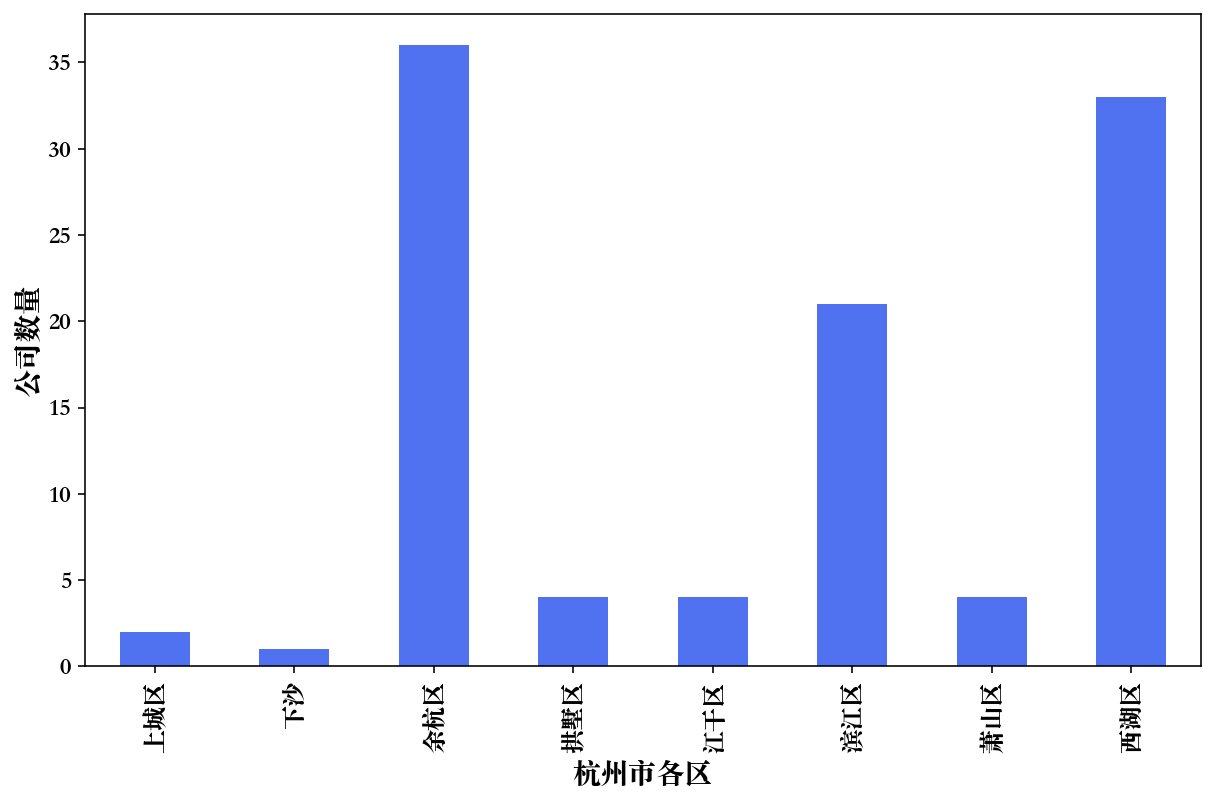

<AxesSubplot:xlabel='district'>

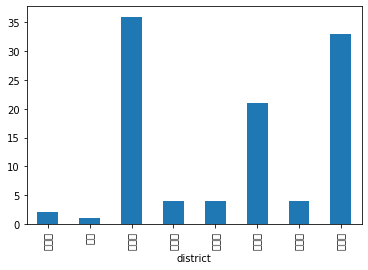

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

df.groupby('district').size().plot.bar()

## 聚合

### 17 - 聚合统计

分组计算不同行政区，薪水的最小值、最大值和平均值

In [71]:
df.groupby('district')['salary'].agg(['min', 'max', 'mean'])

min    max          mean
district                            
上城区       22500  30000  26250.000000
下沙        30000  30000  30000.000000
余杭区        7500  60000  33583.333333
拱墅区       24000  30000  28500.000000
江干区        3500  45000  25250.000000
滨江区        7500  50000  31428.571429
萧山区       25000  45000  36250.000000
西湖区        6500  45000  30893.939394

In [74]:
df.pivot_table(
    index='district',
    values='salary', 
    aggfunc=['min','max','mean']
)

min    max          mean
         salary salary        salary
district                            
上城区       22500  30000  26250.000000
下沙        30000  30000  30000.000000
余杭区        7500  60000  33583.333333
拱墅区       24000  30000  28500.000000
江干区        3500  45000  25250.000000
滨江区        7500  50000  31428.571429
萧山区       25000  45000  36250.000000
西湖区        6500  45000  30893.939394

### 18 - 聚合统计｜修改列名

将上一题的列名（包括索引名）修改为中文

In [75]:
(df.groupby(['district'], as_index = False)['salary']
    .agg(['min', 'max', 'mean'])
    .reset_index()
    .rename({'district':'行政区', 'min':'最低工资', 'max': '最高工资', 'mean':'平均工资'}, axis=1)
    .set_index('行政区')
)

最低工资   最高工资          平均工资
行政区                            
上城区  22500  30000  26250.000000
下沙   30000  30000  30000.000000
余杭区   7500  60000  33583.333333
拱墅区  24000  30000  28500.000000
江干区   3500  45000  25250.000000
滨江区   7500  50000  31428.571429
萧山区  25000  45000  36250.000000
西湖区   6500  45000  30893.939394

### 19 - 聚合统计｜组合

对不同岗位(`positionName`)进行分组，并统计其薪水(`salary`)中位数和得分(`score`)均值

In [76]:
df.groupby(['positionName'])['salary'].agg(['median', 'mean'])

median          mean
positionName                                  
BI数据分析师                  20000.0  16833.333333
bi数据分析师                  40000.0  40000.000000
业务与数据分析师                 30000.0  30000.000000
产品经理/数据分析（核心业务）-2020届春招  60000.0  60000.000000
产品运营（偏数据分析）              27500.0  27500.000000
商业数据分析                   35000.0  35000.000000
商业数据分析师                  37500.0  37500.000000
商业数据分析师（阿里数据银行）          22500.0  22500.000000
大数据分析工程师(J11108)         30000.0  30000.000000
大数据建模总监                  37500.0  37500.000000
奔驰·耀出行-BI数据分析专家          30000.0  30000.000000
奔驰耀出行-战略数据分析师            42500.0  42500.000000
店铺数据分析师                  30000.0  30000.000000
数据分析                     30000.0  32285.714286
数据分析-2020届春招             30000.0  30000.000000
数据分析专员                   26250.0  26250.000000
数据分析专家                   31250.0  35833.333333
数据分析专家-LQ(J181203029)    21500.0  21500.000000
数据分析专家03-10-217          23750.0  23750.000000
数据分析专家（游戏业务）             37500.0  37500.000000
数据分析实习生                  40000.0  40000.000000
数据分析实习生 (MJ000087)       26500.0  26500.000000
数据分析工程师                  20000.0  20000.000000
数据分析师                    37500.0  34083.333333
数据分析师 (MJ000250)         27500.0  27500.000000
数据分析师(J10147)            37500.0  37500.000000
数据分析师-Lark               30000.0  30000.000000
数据分析师-企业SaaS应用           40000.0  40000.000000
数据分析师/BI                 45000.0  45000.000000
数据分析师（保险）13-01-19        40000.0  40000.000000
数据分析师（社招）                30000.0  30000.000000
数据分析师（财务方向）              37500.0  37500.000000
数据分析建模工程师                30000.0  30000.000000
数据分析建模工程师（校招）            36500.0  36500.000000
数据分析经理                   30000.0  30000.000000
数据分析负责人 or 数据分析师         30000.0  30000.000000
数据建模                     15000.0  15000.000000
数据建模专家-杭州-01546          30000.0  30000.000000
数据建模工程师                  36250.0  36250.000000
旅游大数据分析师（杭州）             30000.0  30000.000000
智能数据分析引擎研发专家             30000.0  30000.000000
浙江数据分析师                  37500.0  37500.000000
解决方案顾问/数据分析师             25000.0  25000.000000
财务数据分析师                  37500.0  37500.000000
资深数据分析/数据分析专家G00796      45000.0  45000.000000
资深数据分析专员                 30000.0  30000.000000
资深数据分析师                  30000.0  24888.888889
资深数据分析师 (MJ000088)       25000.0  25000.000000
资深数据分析师（商品方向）G01053      45000.0  45000.000000
资深数据分析师（杭州）              37500.0  37500.000000
金融数据分析师                  22500.0  22500.000000
银行数据分析岗                  50000.0  50000.000000
高级数据分析专员                 22500.0  22500.000000
高级数据分析师                  30000.0  26666.666667
高级财务数据分析师                28750.0  28750.000000

In [77]:
df.pivot_table(index='positionName', values='salary',aggfunc=['median', 'mean'])

median          mean
                        salary        salary
positionName                                
BI数据分析师                  20000  16833.333333
bi数据分析师                  40000  40000.000000
业务与数据分析师                 30000  30000.000000
产品经理/数据分析（核心业务）-2020届春招  60000  60000.000000
产品运营（偏数据分析）              27500  27500.000000
商业数据分析                   35000  35000.000000
商业数据分析师                  37500  37500.000000
商业数据分析师（阿里数据银行）          22500  22500.000000
大数据分析工程师(J11108)         30000  30000.000000
大数据建模总监                  37500  37500.000000
奔驰·耀出行-BI数据分析专家          30000  30000.000000
奔驰耀出行-战略数据分析师            42500  42500.000000
店铺数据分析师                  30000  30000.000000
数据分析                     30000  32285.714286
数据分析-2020届春招             30000  30000.000000
数据分析专员                   26250  26250.000000
数据分析专家                   31250  35833.333333
数据分析专家-LQ(J181203029)    21500  21500.000000
数据分析专家03-10-217          23750  23750.000000
数据分析专家（游戏业务）             37500  37500.000000
数据分析实习生                  40000  40000.000000
数据分析实习生 (MJ000087)       26500  26500.000000
数据分析工程师                  20000  20000.000000
数据分析师                    37500  34083.333333
数据分析师 (MJ000250)         27500  27500.000000
数据分析师(J10147)            37500  37500.000000
数据分析师-Lark               30000  30000.000000
数据分析师-企业SaaS应用           40000  40000.000000
数据分析师/BI                 45000  45000.000000
数据分析师（保险）13-01-19        40000  40000.000000
数据分析师（社招）                30000  30000.000000
数据分析师（财务方向）              37500  37500.000000
数据分析建模工程师                30000  30000.000000
数据分析建模工程师（校招）            36500  36500.000000
数据分析经理                   30000  30000.000000
数据分析负责人 or 数据分析师         30000  30000.000000
数据建模                     15000  15000.000000
数据建模专家-杭州-01546          30000  30000.000000
数据建模工程师                  36250  36250.000000
旅游大数据分析师（杭州）             30000  30000.000000
智能数据分析引擎研发专家             30000  30000.000000
浙江数据分析师                  37500  37500.000000
解决方案顾问/数据分析师             25000  25000.000000
财务数据分析师                  37500  37500.000000
资深数据分析/数据分析专家G00796      45000  45000.000000
资深数据分析专员                 30000  30000.000000
资深数据分析师                  30000  24888.888889
资深数据分析师 (MJ000088)       25000  25000.000000
资深数据分析师（商品方向）G01053      45000  45000.000000
资深数据分析师（杭州）              37500  37500.000000
金融数据分析师                  22500  22500.000000
银行数据分析岗                  50000  50000.000000
高级数据分析专员                 22500  22500.000000
高级数据分析师                  30000  26666.666667
高级财务数据分析师                28750  28750.000000

### 20 -聚合统计｜多层

对不同行政区进行分组，并统计薪水的均值、中位数、方差，以及得分的均值

In [78]:
df.groupby(['district'])[['salary','score']].agg({'salary':['mean','median', 'std'], 'score': 'mean'})

salary                             score
                  mean   median           std       mean
district                                                
上城区       26250.000000  26250.0   5303.300859   2.000000
下沙        30000.000000  30000.0           NaN   6.000000
余杭区       33583.333333  30000.0  10857.847721  15.166667
拱墅区       28500.000000  30000.0   3000.000000   2.750000
江干区       25250.000000  26250.0  17255.433927  39.250000
滨江区       31428.571429  30000.0  10445.436461  12.952381
萧山区       36250.000000  37500.0  10307.764064  18.250000
西湖区       30893.939394  30000.0   7962.566302   8.060606

In [79]:
df.pivot_table(index='district', values=['salary','score'], aggfunc={'salary':['mean','median', 'std'], 'score': 'mean'})

salary                             score
                  mean   median           std       mean
district                                                
上城区       26250.000000  26250.0   5303.300859   2.000000
下沙        30000.000000  30000.0           NaN   6.000000
余杭区       33583.333333  30000.0  10857.847721  15.166667
拱墅区       28500.000000  30000.0   3000.000000   2.750000
江干区       25250.000000  26250.0  17255.433927  39.250000
滨江区       31428.571429  30000.0  10445.436461  12.952381
萧山区       36250.000000  37500.0  10307.764064  18.250000
西湖区       30893.939394  30000.0   7962.566302   8.060606

### 21 - 聚合统计｜自定义函数

在 18 题基础上，在聚合计算时新增一列计算最大值与平均值的差值

最低工资   最高工资          平均工资      最大值与均值差值
行政区                                          
上城区  22500  30000  26250.000000   3750.000000
下沙   30000  30000  30000.000000      0.000000
余杭区   7500  60000  33583.333333  26416.666667
拱墅区  24000  30000  28500.000000   1500.000000
江干区   3500  45000  25250.000000  19750.000000
滨江区   7500  50000  31428.571429  18571.428571
萧山区  25000  45000  36250.000000   8750.000000
西湖区   6500  45000  30893.939394  14106.060606

In [80]:
df.pivot_table(index='district', values='salary', aggfunc=['min','max','mean', lambda x: np.max(x) - np.mean(x)])

min    max          mean      <lambda>
         salary salary        salary        salary
district                                          
上城区       22500  30000  26250.000000   3750.000000
下沙        30000  30000  30000.000000      0.000000
余杭区        7500  60000  33583.333333  26416.666667
拱墅区       24000  30000  28500.000000   1500.000000
江干区        3500  45000  25250.000000  19750.000000
滨江区        7500  50000  31428.571429  18571.428571
萧山区       25000  45000  36250.000000   8750.000000
西湖区        6500  45000  30893.939394  14106.060606